In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer


load data

In [3]:
abusive = pd.read_csv('abusive_cleansing.csv')
abusive

,Unnamed: 0,NEW ABUSIVE
0,0,alay
1,1,ampas
2,2,buta
3,3,keparat
4,4,anjing
...,...,...
120,120,rezim
121,121,sange
122,122,serbet
123,123,sipit


In [4]:
df = pd.read_csv('data_cleansing.csv')
df

,Unnamed: 0,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong,Tweet After Cleansing
0,0,1,1,1,0,0,0,0,0,1,1,0,0,disaat semua cowok berusaha melacak perhatian...
1,1,0,1,0,0,0,0,0,0,0,0,0,0,siapa yang telat ngasih tau eluedan sarap gue...
2,2,0,0,0,0,0,0,0,0,0,0,0,0,kadang aku berfikir kenapa aku tetap percaya ...
3,3,0,0,0,0,0,0,0,0,0,0,0,0,aku itu aku tau matamu sipit tapi diliat dari...
4,4,1,1,0,1,1,0,0,0,0,0,1,0,kaum cebong kapir udah keliatan dongoknya dar...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12931,13164,1,1,1,0,0,0,1,0,0,1,0,0,jangan asal ngomong ndasmu congor lu yg sekat...
12932,13165,0,1,0,0,0,0,0,0,0,0,0,0,kasur mana enak kunyuk
12933,13166,0,0,0,0,0,0,0,0,0,0,0,0,hati hati bisu g bosan huft
12934,13167,0,0,0,0,0,0,0,0,0,0,0,0,bom yang real mudah terdeteksi bom yang terku...


In [5]:
#ubah urutan kolom
df = df[['Tweet After Cleansing', 'HS', 'Abusive', 'HS_Individual', 'HS_Group', 'HS_Religion', 'HS_Race', 'HS_Physical', 'HS_Gender', 'HS_Other', 'HS_Weak', 'HS_Moderate', 'HS_Strong']]
df

,Tweet After Cleansing,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong
0,disaat semua cowok berusaha melacak perhatian...,1,1,1,0,0,0,0,0,1,1,0,0
1,siapa yang telat ngasih tau eluedan sarap gue...,0,1,0,0,0,0,0,0,0,0,0,0
2,kadang aku berfikir kenapa aku tetap percaya ...,0,0,0,0,0,0,0,0,0,0,0,0
3,aku itu aku tau matamu sipit tapi diliat dari...,0,0,0,0,0,0,0,0,0,0,0,0
4,kaum cebong kapir udah keliatan dongoknya dar...,1,1,0,1,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12931,jangan asal ngomong ndasmu congor lu yg sekat...,1,1,1,0,0,0,1,0,0,1,0,0
12932,kasur mana enak kunyuk,0,1,0,0,0,0,0,0,0,0,0,0
12933,hati hati bisu g bosan huft,0,0,0,0,0,0,0,0,0,0,0,0
12934,bom yang real mudah terdeteksi bom yang terku...,0,0,0,0,0,0,0,0,0,0,0,0


In [6]:
#cek 5 data teratas
df.head()

,Tweet After Cleansing,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong
0,disaat semua cowok berusaha melacak perhatian...,1,1,1,0,0,0,0,0,1,1,0,0
1,siapa yang telat ngasih tau eluedan sarap gue...,0,1,0,0,0,0,0,0,0,0,0,0
2,kadang aku berfikir kenapa aku tetap percaya ...,0,0,0,0,0,0,0,0,0,0,0,0
3,aku itu aku tau matamu sipit tapi diliat dari...,0,0,0,0,0,0,0,0,0,0,0,0
4,kaum cebong kapir udah keliatan dongoknya dar...,1,1,0,1,1,0,0,0,0,0,1,0


In [7]:
#cek 5 data terbawah
df.tail()


,Tweet After Cleansing,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong
12931,jangan asal ngomong ndasmu congor lu yg sekat...,1,1,1,0,0,0,1,0,0,1,0,0
12932,kasur mana enak kunyuk,0,1,0,0,0,0,0,0,0,0,0,0
12933,hati hati bisu g bosan huft,0,0,0,0,0,0,0,0,0,0,0,0
12934,bom yang real mudah terdeteksi bom yang terku...,0,0,0,0,0,0,0,0,0,0,0,0
12935,mana situ ngasih itu cuma foto ya kutil onta,1,1,1,0,0,0,0,0,1,1,0,0


In [8]:
#melihat jumlah baris dan kolom
df.shape

(12936, 13)

In [10]:
#cek duplikasi
df.duplicated().sum()

0

In [11]:
#cek missing value
df.isna()

,Tweet After Cleansing,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12931,False,False,False,False,False,False,False,False,False,False,False,False,False
12932,False,False,False,False,False,False,False,False,False,False,False,False,False
12933,False,False,False,False,False,False,False,False,False,False,False,False,False
12934,False,False,False,False,False,False,False,False,False,False,False,False,False


In [12]:
#melihat jumlah data yang hilang/kosong
df.isna().sum()

Tweet After Cleansing    0
HS                       0
Abusive                  0
HS_Individual            0
HS_Group                 0
HS_Religion              0
HS_Race                  0
HS_Physical              0
HS_Gender                0
HS_Other                 0
HS_Weak                  0
HS_Moderate              0
HS_Strong                0
dtype: int64

In [13]:
#melihat persentasi
df.isna().sum()/df.shape[0]

Tweet After Cleansing    0.0
HS                       0.0
Abusive                  0.0
HS_Individual            0.0
HS_Group                 0.0
HS_Religion              0.0
HS_Race                  0.0
HS_Physical              0.0
HS_Gender                0.0
HS_Other                 0.0
HS_Weak                  0.0
HS_Moderate              0.0
HS_Strong                0.0
dtype: float64

In [14]:
#menilai suatu kalimat dari kolom "tweet after cleansing" berisi kata abusive atau tidak dengan melihat dan mencocokan data dari dataframe "abusive"
def deteksi_abusive(kalimat, df_abusive):
    kata_dalam_kalimat = kalimat.lower().split()
    kata_abusive = df_abusive['NEW ABUSIVE'].str.lower().values
    
    if any(kata in kata_dalam_kalimat for kata in kata_abusive):
        return 'Abusive'
    else:
        return 'Normal'
                        

In [15]:
#buat kolom baru dari hasil penilaian 
df['Status'] = df['Tweet After Cleansing'].apply(lambda x: deteksi_abusive(x, abusive))
df
       

,Tweet After Cleansing,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong,Status
0,disaat semua cowok berusaha melacak perhatian...,1,1,1,0,0,0,0,0,1,1,0,0,Abusive
1,siapa yang telat ngasih tau eluedan sarap gue...,0,1,0,0,0,0,0,0,0,0,0,0,Abusive
2,kadang aku berfikir kenapa aku tetap percaya ...,0,0,0,0,0,0,0,0,0,0,0,0,Normal
3,aku itu aku tau matamu sipit tapi diliat dari...,0,0,0,0,0,0,0,0,0,0,0,0,Abusive
4,kaum cebong kapir udah keliatan dongoknya dar...,1,1,0,1,1,0,0,0,0,0,1,0,Abusive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12931,jangan asal ngomong ndasmu congor lu yg sekat...,1,1,1,0,0,0,1,0,0,1,0,0,Abusive
12932,kasur mana enak kunyuk,0,1,0,0,0,0,0,0,0,0,0,0,Abusive
12933,hati hati bisu g bosan huft,0,0,0,0,0,0,0,0,0,0,0,0,Abusive
12934,bom yang real mudah terdeteksi bom yang terku...,0,0,0,0,0,0,0,0,0,0,0,0,Normal


In [16]:
#membuat kolom yg berisi jumlah karakter dari kolom "tweet after cleansing"
df['Total Karakter'] = df['Tweet After Cleansing'].apply(lambda x: len(str(x)))
df

,Tweet After Cleansing,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong,Status,Total Karakter
0,disaat semua cowok berusaha melacak perhatian...,1,1,1,0,0,0,0,0,1,1,0,0,Abusive,129
1,siapa yang telat ngasih tau eluedan sarap gue...,0,1,0,0,0,0,0,0,0,0,0,0,Abusive,105
2,kadang aku berfikir kenapa aku tetap percaya ...,0,0,0,0,0,0,0,0,0,0,0,0,Normal,245
3,aku itu aku tau matamu sipit tapi diliat dari...,0,0,0,0,0,0,0,0,0,0,0,0,Abusive,59
4,kaum cebong kapir udah keliatan dongoknya dar...,1,1,0,1,1,0,0,0,0,0,1,0,Abusive,79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12931,jangan asal ngomong ndasmu congor lu yg sekat...,1,1,1,0,0,0,1,0,0,1,0,0,Abusive,54
12932,kasur mana enak kunyuk,0,1,0,0,0,0,0,0,0,0,0,0,Abusive,23
12933,hati hati bisu g bosan huft,0,0,0,0,0,0,0,0,0,0,0,0,Abusive,29
12934,bom yang real mudah terdeteksi bom yang terku...,0,0,0,0,0,0,0,0,0,0,0,0,Normal,115


In [17]:
#membuat kolom total kata yang merupakan jumlah kata dari kolom"tweet after cleansing"
df['Total Kata'] = df['Tweet After Cleansing'].apply(lambda sent: len(sent.split()))
df

,Tweet After Cleansing,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong,Status,Total Karakter,Total Kata
0,disaat semua cowok berusaha melacak perhatian...,1,1,1,0,0,0,0,0,1,1,0,0,Abusive,129,21
1,siapa yang telat ngasih tau eluedan sarap gue...,0,1,0,0,0,0,0,0,0,0,0,0,Abusive,105,18
2,kadang aku berfikir kenapa aku tetap percaya ...,0,0,0,0,0,0,0,0,0,0,0,0,Normal,245,36
3,aku itu aku tau matamu sipit tapi diliat dari...,0,0,0,0,0,0,0,0,0,0,0,0,Abusive,59,12
4,kaum cebong kapir udah keliatan dongoknya dar...,1,1,0,1,1,0,0,0,0,0,1,0,Abusive,79,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12931,jangan asal ngomong ndasmu congor lu yg sekat...,1,1,1,0,0,0,1,0,0,1,0,0,Abusive,54,9
12932,kasur mana enak kunyuk,0,1,0,0,0,0,0,0,0,0,0,0,Abusive,23,4
12933,hati hati bisu g bosan huft,0,0,0,0,0,0,0,0,0,0,0,0,Abusive,29,6
12934,bom yang real mudah terdeteksi bom yang terku...,0,0,0,0,0,0,0,0,0,0,0,0,Normal,115,18


In [18]:
#membuat kolom yg merupakan penjedaan tiap kata pada kalimat dari kolom "tweet after cleansing"
df['kata'] = df['Tweet After Cleansing'].apply(lambda x: str(x).split())
df

,Tweet After Cleansing,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong,Status,Total Karakter,Total Kata,kata
0,disaat semua cowok berusaha melacak perhatian...,1,1,1,0,0,0,0,0,1,1,0,0,Abusive,129,21,"[disaat, semua, cowok, berusaha, melacak, perh..."
1,siapa yang telat ngasih tau eluedan sarap gue...,0,1,0,0,0,0,0,0,0,0,0,0,Abusive,105,18,"[siapa, yang, telat, ngasih, tau, eluedan, sar..."
2,kadang aku berfikir kenapa aku tetap percaya ...,0,0,0,0,0,0,0,0,0,0,0,0,Normal,245,36,"[kadang, aku, berfikir, kenapa, aku, tetap, pe..."
3,aku itu aku tau matamu sipit tapi diliat dari...,0,0,0,0,0,0,0,0,0,0,0,0,Abusive,59,12,"[aku, itu, aku, tau, matamu, sipit, tapi, dili..."
4,kaum cebong kapir udah keliatan dongoknya dar...,1,1,0,1,1,0,0,0,0,0,1,0,Abusive,79,12,"[kaum, cebong, kapir, udah, keliatan, dongokny..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12931,jangan asal ngomong ndasmu congor lu yg sekat...,1,1,1,0,0,0,1,0,0,1,0,0,Abusive,54,9,"[jangan, asal, ngomong, ndasmu, congor, lu, yg..."
12932,kasur mana enak kunyuk,0,1,0,0,0,0,0,0,0,0,0,0,Abusive,23,4,"[kasur, mana, enak, kunyuk]"
12933,hati hati bisu g bosan huft,0,0,0,0,0,0,0,0,0,0,0,0,Abusive,29,6,"[hati, hati, bisu, g, bosan, huft]"
12934,bom yang real mudah terdeteksi bom yang terku...,0,0,0,0,0,0,0,0,0,0,0,0,Normal,115,18,"[bom, yang, real, mudah, terdeteksi, bom, yang..."


In [31]:
#memanggil dataframe
df

,Tweet After Cleansing,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong,Status,Total Karakter,Total Kata,kata
0,disaat semua cowok berusaha melacak perhatian...,1,1,1,0,0,0,0,0,1,1,0,0,Abusive,129,21,"[disaat, semua, cowok, berusaha, melacak, perh..."
1,siapa yang telat ngasih tau eluedan sarap gue...,0,1,0,0,0,0,0,0,0,0,0,0,Abusive,105,18,"[siapa, yang, telat, ngasih, tau, eluedan, sar..."
2,kadang aku berfikir kenapa aku tetap percaya ...,0,0,0,0,0,0,0,0,0,0,0,0,Normal,245,36,"[kadang, aku, berfikir, kenapa, aku, tetap, pe..."
3,aku itu aku tau matamu sipit tapi diliat dari...,0,0,0,0,0,0,0,0,0,0,0,0,Abusive,59,12,"[aku, itu, aku, tau, matamu, sipit, tapi, dili..."
4,kaum cebong kapir udah keliatan dongoknya dar...,1,1,0,1,1,0,0,0,0,0,1,0,Abusive,79,12,"[kaum, cebong, kapir, udah, keliatan, dongokny..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12931,jangan asal ngomong ndasmu congor lu yg sekat...,1,1,1,0,0,0,1,0,0,1,0,0,Abusive,54,9,"[jangan, asal, ngomong, ndasmu, congor, lu, yg..."
12932,kasur mana enak kunyuk,0,1,0,0,0,0,0,0,0,0,0,0,Abusive,23,4,"[kasur, mana, enak, kunyuk]"
12933,hati hati bisu g bosan huft,0,0,0,0,0,0,0,0,0,0,0,0,Abusive,29,6,"[hati, hati, bisu, g, bosan, huft]"
12934,bom yang real mudah terdeteksi bom yang terku...,0,0,0,0,0,0,0,0,0,0,0,0,Normal,115,18,"[bom, yang, real, mudah, terdeteksi, bom, yang..."


In [26]:
#mendefine dataframe
##data = df
#df = pd.DataFrame(data)
#mendefine dataframe
##data = df
#df = pd.DataFrame(data)



In [32]:
#melihat kolom yang hanya berisi numerik
kolom_angka = df.select_dtypes(include='number')
kolom_angka

,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong,Total Karakter,Total Kata
0,1,1,1,0,0,0,0,0,1,1,0,0,129,21
1,0,1,0,0,0,0,0,0,0,0,0,0,105,18
2,0,0,0,0,0,0,0,0,0,0,0,0,245,36
3,0,0,0,0,0,0,0,0,0,0,0,0,59,12
4,1,1,0,1,1,0,0,0,0,0,1,0,79,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12931,1,1,1,0,0,0,1,0,0,1,0,0,54,9
12932,0,1,0,0,0,0,0,0,0,0,0,0,23,4
12933,0,0,0,0,0,0,0,0,0,0,0,0,29,6
12934,0,0,0,0,0,0,0,0,0,0,0,0,115,18


In [35]:
#menghitung mean dari kolom yang berisi numerik
menghitung_mean = df.select_dtypes(include='number')
menghitung_mean.mean()

HS                 0.423624
Abusive            0.383581
HS_Individual      0.271181
HS_Group           0.152443
HS_Religion        0.060606
HS_Race            0.043135
HS_Physical        0.024814
HS_Gender          0.023036
HS_Other           0.284632
HS_Weak            0.256416
HS_Moderate        0.130798
HS_Strong          0.036410
Total Karakter    96.921846
Total Kata        15.348717
dtype: float64

In [36]:
#melihat kolom apa saja yang ada di dataframe
print(df.columns)

Index(['Tweet After Cleansing', 'HS', 'Abusive', 'HS_Individual', 'HS_Group',
       'HS_Religion', 'HS_Race', 'HS_Physical', 'HS_Gender', 'HS_Other',
       'HS_Weak', 'HS_Moderate', 'HS_Strong', 'Status', 'Total Karakter',
       'Total Kata', 'kata'],
      dtype='object')


In [37]:

#memghitung rata-rata dari kolom total karakter yg mengandung abusive dan normal
avg_karakter_per_kategori = df.groupby('Status').agg({'Total Karakter' :["mean"]}).reset_index()
avg_karakter_per_kategori

,Status,Total Karakter
,,mean
0,Abusive,89.343814
1,Normal,104.326150


In [38]:
##memghitung rata-rata dari kolom total kata yg mengandung abusive dan normal
avg_karakter_per_kategori = df.groupby('Status').agg({'Total Kata' :["mean"]}).reset_index()
avg_karakter_per_kategori

,Status,Total Kata
,,mean
0,Abusive,14.638667
1,Normal,16.042488


In [39]:
#perhitungan 2 diatas di jadikan 1
avg_karakter_dan_kata_per_kategori = df.groupby('Status').agg({'Total Kata':["mean"], 'Total Karakter':["mean"]}).reset_index()
avg_karakter_dan_kata_per_kategori

,Status,Total Kata,Total Karakter
,,mean,mean
0,Abusive,14.638667,89.343814
1,Normal,16.042488,104.326150


In [40]:
#mendeskripsikan data
df.describe()

,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong,Total Karakter,Total Kata
count,12936.000000,12936.000000,12936.000000,12936.000000,12936.000000,12936.000000,12936.000000,12936.000000,12936.000000,12936.000000,12936.000000,12936.000000,12936.000000,12936.000000
mean,0.423624,0.383581,0.271181,0.152443,0.060606,0.043135,0.024814,0.023036,0.284632,0.256416,0.130798,0.036410,96.921846,15.348717
std,0.494151,0.486276,0.444587,0.359463,0.238616,0.203170,0.155565,0.150025,0.451256,0.436671,0.337192,0.187315,63.117993,9.897753
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,47.000000,8.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,84.000000,13.000000
75%,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,131.000000,21.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,274.000000,52.000000


In [41]:
#menhitung median
menghitung_median = df.select_dtypes(include='number')
menghitung_median.median()

HS                 0.0
Abusive            0.0
HS_Individual      0.0
HS_Group           0.0
HS_Religion        0.0
HS_Race            0.0
HS_Physical        0.0
HS_Gender          0.0
HS_Other           0.0
HS_Weak            0.0
HS_Moderate        0.0
HS_Strong          0.0
Total Karakter    84.0
Total Kata        13.0
dtype: float64

In [42]:
#melihat kolom yg ada di dataframe
print(df.columns)

Index(['Tweet After Cleansing', 'HS', 'Abusive', 'HS_Individual', 'HS_Group',
       'HS_Religion', 'HS_Race', 'HS_Physical', 'HS_Gender', 'HS_Other',
       'HS_Weak', 'HS_Moderate', 'HS_Strong', 'Status', 'Total Karakter',
       'Total Kata', 'kata'],
      dtype='object')


In [43]:
#menghitun median dari koloom total karakter
median_karakter_per_kategori = df.groupby('Status').agg({'Total Karakter':["median"]}).reset_index()
median_karakter_per_kategori

,Status,Total Karakter
,,median
0,Abusive,75.0
1,Normal,91.0


In [44]:
#menghitung median dari total kata
median_kata_per_kategori = df.groupby('Status').agg({'Total Kata':["median"]}).reset_index()
median_kata_per_kategori

,Status,Total Kata
,,median
0,Abusive,12.0
1,Normal,14.0


In [45]:
#perjitungan 2 diatas dijadikan 1
median_karakter_dan_kata_per_kategori = df.groupby('Status').agg({'Total Karakter':["median"], 'Total Kata':["median"]}).reset_index()
median_karakter_dan_kata_per_kategori

,Status,Total Karakter,Total Kata
,,median,median
0,Abusive,75.0,12.0
1,Normal,91.0,14.0


In [46]:
#menghitung modus dari kolom total karakter
df['Total Karakter'].mode()

0    35
Name: Total Karakter, dtype: int64

In [48]:
#menghitung modus dari kolom total kata
df['Total Kata'].mode()

0    10
Name: Total Kata, dtype: int64

In [49]:
#perhitungan 2 diatas dijadikan 1
modus_karakter_dan_kata_per_kategori = df.groupby('Status').agg({'Total Karakter':pd.Series.mode, 'Total Kata':pd.Series.mode}).reset_index()
modus_karakter_dan_kata_per_kategori

,Status,Total Karakter,Total Kata
0,Abusive,22,5
1,Normal,64,10


In [50]:
#menghitung range dari kolom total karakter
range_total_karakter = df['Total Karakter'].max() - df['Total Karakter'].min()
range_total_karakter

273

In [51]:
#perhitungan range jika di jabarkan
df['Total Karakter'].max()

274

In [52]:
#perhitungan range jika di jabarkan
df['Total Karakter'].min()

1

In [53]:
#menghitung range dari kolom total kata
range_total_kata = df['Total Kata'].max() - df['Total Kata'].min()
range_total_kata

52

In [54]:
#perhitungan range jika di jabarkan
df['Total Kata'].max() 

52

In [55]:
#perhitungan range jika di jabarkan
df['Total Kata'].min()

0

In [56]:
#hasil perhitungan range dijadikan 1
df.groupby('Status').agg({'Total Kata':["min","max"], 'Total Karakter':["min","max"]}).reset_index()


Status Total Kata     Total Karakter     
                  min max            min  max
0  Abusive          1  52              5  274
1   Normal          0  50              1  271

total karakter

In [57]:
#mengitung char dari koloom total karakter
p0 = df['Total Karakter'].min()
p0


1

In [58]:
#mengitung char dari koloom total karakter
p100 = df['Total Karakter'].max()
p100

274

In [59]:
#mengitung char dari koloom total karakter
q1 = df['Total Karakter'].quantile(0.25)
q1

47.0

In [60]:
#mengitung char dari koloom total karakter
q2 = df['Total Karakter'].quantile(0.5)
q2

84.0

In [61]:
#mengitung char dari koloom total karakter
q3 = df['Total Karakter'].quantile(0.75)
q3

131.0

In [62]:
#mengitung char dari koloom total karakter
iqr = q3-q1
iqr

84.0

In [63]:
#mengitung char dari koloom total karakter
lower_limit = q1-1.5*iqr
lower_limit

-79.0

In [64]:
#mengitung char dari koloom total karakter
upper_limit = q3+1.5*iqr
upper_limit

257.0

In [65]:

#mengitung char dari koloom total karakter
# Batas bawah, nilai minimum, dan outlier Total Char
print("Batas bawah 'Total_Karakter': ", lower_limit)
print("Nilai minimum: ", p0)

if(lower_limit < p0):
  print("Tidak ada outlier dari sisi batas bawah")
else:
  print("Ada outlier dari sisi batas bawah")

Batas bawah 'Total_Karakter':  -79.0
Nilai minimum:  1
Tidak ada outlier dari sisi batas bawah


In [66]:
#mengitung char dari koloom total karakter
# Batas atas, nilai maksimum, dan outlier Total Char
print("Batas atas 'Total_Karakter': ", upper_limit)
print("Nilai maksimum: ", p100)

if(upper_limit > p100):
  print("Tidak ada outlier dari sisi batas atas")
else:
  print("Ada outlier dari sisi batas atas")

Batas atas 'Total_Karakter':  257.0
Nilai maksimum:  274
Ada outlier dari sisi batas atas


total kata

In [67]:
#mengitung char dari koloom total kata
p0 = df['Total Kata'].min()
p0

0

In [68]:
#mengitung char dari koloom total kata
p100 = df['Total Kata'].max()
p100

52

In [69]:
#mengitung char dari koloom total kata
q1 = df['Total Kata'].quantile(0.25)
q1

8.0

In [70]:
#mengitung char dari koloom total kata
q2 = df['Total Kata'].quantile(0.5)
q2

13.0

In [71]:
#mengitung char dari koloom total kata
q3 = df['Total Kata'].quantile(0.75)
q3

21.0

In [72]:
#mengitung char dari koloom total kata
iqr = q3-q1
iqr

13.0

In [73]:
#mengitung char dari koloom total kata
lower_limit = q1-1.5*iqr
lower_limit

-11.5

In [74]:
#mengitung char dari koloom total kata
upper_limit = q3+1.5*iqr
upper_limit

40.5

In [75]:
#mengitung char dari koloom total kata
# Batas bawah, nilai minimum, dan outlier Total Char
print("Batas bawah 'Total_Kata': ", lower_limit)
print("Nilai minimum: ", p0)

if(lower_limit < p0):
  print("Tidak ada outlier dari sisi batas bawah")
else:
  print("Ada outlier dari sisi batas bawah")

Batas bawah 'Total_Kata':  -11.5
Nilai minimum:  0
Tidak ada outlier dari sisi batas bawah


In [76]:
#mengitung char dari koloom total kata
# Batas atas, nilai maksimum, dan outlier Total Word
print("Batas atas 'Total_Kata': ", upper_limit)
print("Nilai maksimum: ", p100)

if(upper_limit > p100):
  print("Tidak ada outlier dari sisi batas atas")
else:
  print("Ada outlier dari sisi batas atas")

Batas atas 'Total_Kata':  40.5
Nilai maksimum:  52
Ada outlier dari sisi batas atas


In [77]:

#menghitung varian
menghitung_var = df.select_dtypes(include='number')
menghitung_var.var()

HS                   0.244186
Abusive              0.236465
HS_Individual        0.197657
HS_Group             0.129214
HS_Religion          0.056937
HS_Race              0.041278
HS_Physical          0.024201
HS_Gender            0.022508
HS_Other             0.203632
HS_Weak              0.190682
HS_Moderate          0.113699
HS_Strong            0.035087
Total Karakter    3983.881097
Total Kata          97.965515
dtype: float64

In [78]:
#menghitung varian
menghitung_standar_deviasi = df.select_dtypes(include='number')
menghitung_standar_deviasi.std()

HS                 0.494151
Abusive            0.486276
HS_Individual      0.444587
HS_Group           0.359463
HS_Religion        0.238616
HS_Race            0.203170
HS_Physical        0.155565
HS_Gender          0.150025
HS_Other           0.451256
HS_Weak            0.436671
HS_Moderate        0.337192
HS_Strong          0.187315
Total Karakter    63.117993
Total Kata         9.897753
dtype: float64

In [122]:
#menghitung skew
menghitung_skew = df.select_dtypes(include='number')
menghitung_skew.skew()


HS                0.309168
Abusive           0.478893
HS_Individual     1.029515
HS_Group          1.934054
HS_Religion       3.683431
HS_Race           4.498063
HS_Physical       6.110087
HS_Gender         6.359430
HS_Other          0.954673
HS_Weak           1.115812
HS_Moderate       2.190202
HS_Strong         4.950600
Total Karakter    0.765909
Total Kata        0.845775
dtype: float64

In [80]:
#menghitung kurtosis
menghitung_kurtosis = df.select_dtypes(include='number')
menghitung_kurtosis.kurtosis()


HS                -1.904710
Abusive           -1.770935
HS_Individual     -0.940245
HS_Group           1.740836
HS_Religion       11.569451
HS_Race           18.235387
HS_Physical       35.338633
HS_Gender         38.448299
HS_Other          -1.088767
HS_Weak           -0.755080
HS_Moderate        2.797415
HS_Strong         22.511918
Total Karakter    -0.328256
Total Kata        -0.026080
dtype: float64

<Axes: >

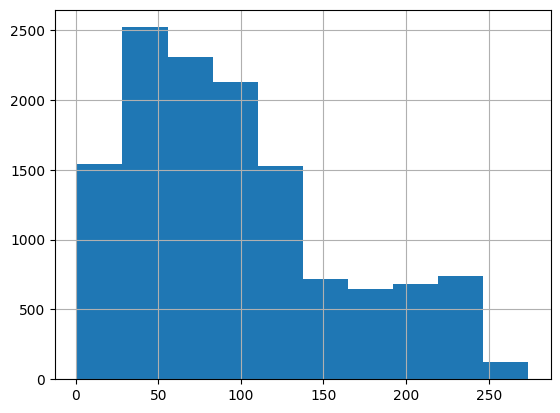

In [81]:
#buat histogram dari kolom total karakter
df['Total Karakter'].hist()

<Axes: xlabel='Total Karakter', ylabel='Density'>

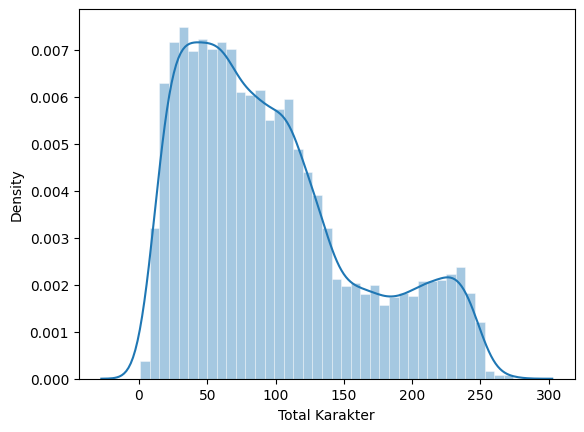

In [82]:
#buat hisplot total karakter
sns.histplot(
    df['Total Karakter'], kde=True,
    stat="density", kde_kws=dict(cut=3),
    alpha=.4, edgecolor=(1, 1, 1, .4),
)

<Axes: >

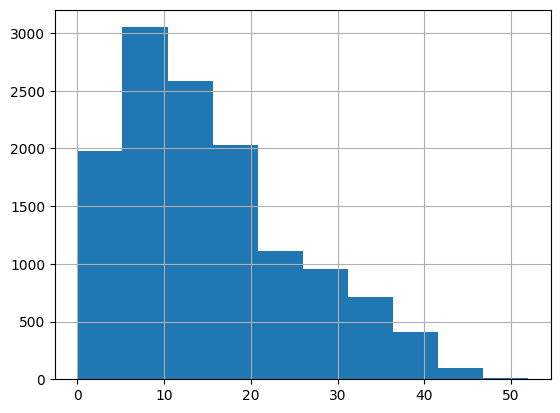

In [83]:
#histogram dari total kata
df['Total Kata'].hist()

<Axes: xlabel='Total Kata', ylabel='Density'>

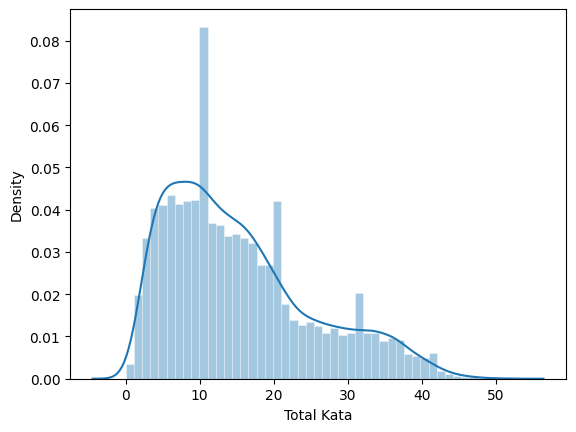

In [84]:
#buat hisplot dari total kata
sns.histplot(
    df['Total Kata'], kde=True,
    stat="density", kde_kws=dict(cut=3),
    alpha=.4, edgecolor=(1, 1, 1, .4),
)

array([[<Axes: title={'center': 'Total Kata'}>,
        <Axes: title={'center': 'Total Karakter'}>]], dtype=object)

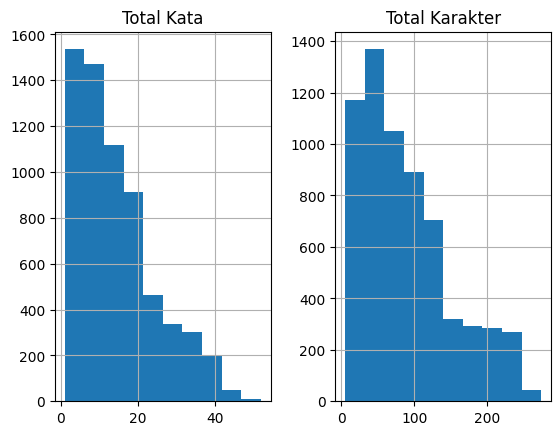

In [85]:
#buat hisplot dari 

df_abusive = df.loc[df['Status']=="Abusive"]
df_abusive[['Total Kata','Total Karakter']].hist()

array([[<Axes: title={'center': 'Total Kata'}>,
        <Axes: title={'center': 'Total Karakter'}>]], dtype=object)

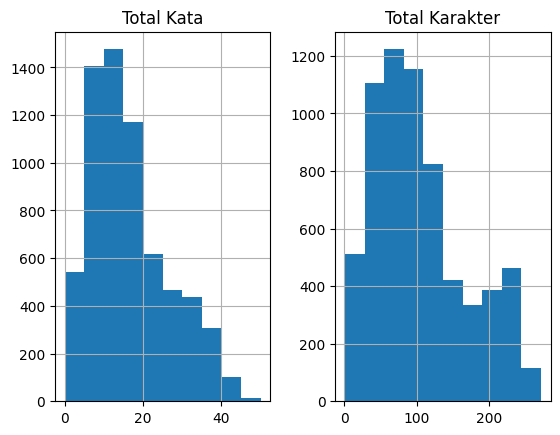

In [86]:
df_neutral = df.loc[df['Status']=="Normal"]
df_neutral[['Total Kata','Total Karakter']].hist()

In [87]:
count_label = df.groupby('Status').Status.count()
count_label

Status
Abusive    6393
Normal     6543
Name: Status, dtype: int64

<Axes: ylabel='Status'>

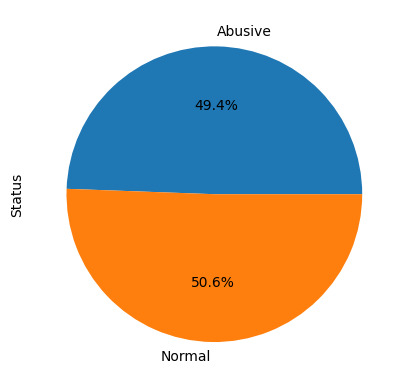

In [88]:
count_label.plot(kind='pie', autopct='%1.1f%%')

In [89]:
from wordcloud import WordCloud

In [90]:
df

,Tweet After Cleansing,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong,Status,Total Karakter,Total Kata,kata
0,disaat semua cowok berusaha melacak perhatian...,1,1,1,0,0,0,0,0,1,1,0,0,Abusive,129,21,"[disaat, semua, cowok, berusaha, melacak, perh..."
1,siapa yang telat ngasih tau eluedan sarap gue...,0,1,0,0,0,0,0,0,0,0,0,0,Abusive,105,18,"[siapa, yang, telat, ngasih, tau, eluedan, sar..."
2,kadang aku berfikir kenapa aku tetap percaya ...,0,0,0,0,0,0,0,0,0,0,0,0,Normal,245,36,"[kadang, aku, berfikir, kenapa, aku, tetap, pe..."
3,aku itu aku tau matamu sipit tapi diliat dari...,0,0,0,0,0,0,0,0,0,0,0,0,Abusive,59,12,"[aku, itu, aku, tau, matamu, sipit, tapi, dili..."
4,kaum cebong kapir udah keliatan dongoknya dar...,1,1,0,1,1,0,0,0,0,0,1,0,Abusive,79,12,"[kaum, cebong, kapir, udah, keliatan, dongokny..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12931,jangan asal ngomong ndasmu congor lu yg sekat...,1,1,1,0,0,0,1,0,0,1,0,0,Abusive,54,9,"[jangan, asal, ngomong, ndasmu, congor, lu, yg..."
12932,kasur mana enak kunyuk,0,1,0,0,0,0,0,0,0,0,0,0,Abusive,23,4,"[kasur, mana, enak, kunyuk]"
12933,hati hati bisu g bosan huft,0,0,0,0,0,0,0,0,0,0,0,0,Abusive,29,6,"[hati, hati, bisu, g, bosan, huft]"
12934,bom yang real mudah terdeteksi bom yang terku...,0,0,0,0,0,0,0,0,0,0,0,0,Normal,115,18,"[bom, yang, real, mudah, terdeteksi, bom, yang..."


In [91]:
text = ' '.join(df['Tweet After Cleansing'])
wordcloud = WordCloud().generate(text)

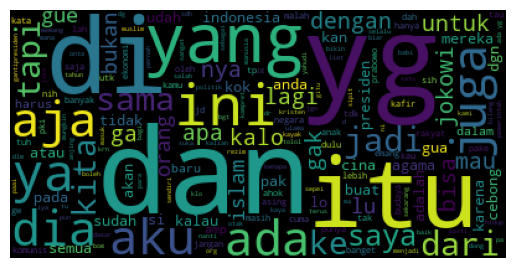

In [93]:
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

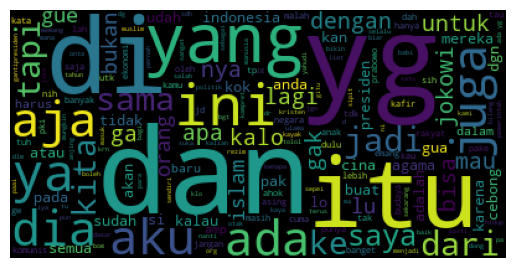

In [95]:
text = ' '.join(df['Tweet After Cleansing'][df.Status=="Abusive"])
wordcloud == WordCloud().generate(text)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

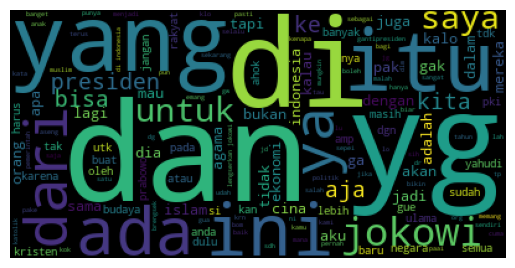

In [96]:
text = ' '.join(df['Tweet After Cleansing'][df.Status=="Normal"])
wordcloud = WordCloud().generate(text)

plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [97]:
import ssl

ssl._create_default_https_context = ssl._create_unverified_context


In [98]:

import nltk
nltk.download('all')


[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     /Users/imamsyubani/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     /Users/imamsyubani/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /Users/imamsyubani/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /Users/imamsyubani/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /Users/imamsyubani/nltk_data...
[nltk_data]    |   Package basque_grammars is already up-to-date!
[nltk_data]

True

In [99]:
from nltk.tokenize import word_tokenize

def word_tokenize_wrapper(text):
    return word_tokenize(text)

    

In [100]:

df['Teks_Token'] = df['Tweet After Cleansing'].apply(word_tokenize_wrapper)
df

,Tweet After Cleansing,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong,Status,Total Karakter,Total Kata,kata,Teks_Token
0,disaat semua cowok berusaha melacak perhatian...,1,1,1,0,0,0,0,0,1,1,0,0,Abusive,129,21,"[disaat, semua, cowok, berusaha, melacak, perh...","[disaat, semua, cowok, berusaha, melacak, perh..."
1,siapa yang telat ngasih tau eluedan sarap gue...,0,1,0,0,0,0,0,0,0,0,0,0,Abusive,105,18,"[siapa, yang, telat, ngasih, tau, eluedan, sar...","[siapa, yang, telat, ngasih, tau, eluedan, sar..."
2,kadang aku berfikir kenapa aku tetap percaya ...,0,0,0,0,0,0,0,0,0,0,0,0,Normal,245,36,"[kadang, aku, berfikir, kenapa, aku, tetap, pe...","[kadang, aku, berfikir, kenapa, aku, tetap, pe..."
3,aku itu aku tau matamu sipit tapi diliat dari...,0,0,0,0,0,0,0,0,0,0,0,0,Abusive,59,12,"[aku, itu, aku, tau, matamu, sipit, tapi, dili...","[aku, itu, aku, tau, matamu, sipit, tapi, dili..."
4,kaum cebong kapir udah keliatan dongoknya dar...,1,1,0,1,1,0,0,0,0,0,1,0,Abusive,79,12,"[kaum, cebong, kapir, udah, keliatan, dongokny...","[kaum, cebong, kapir, udah, keliatan, dongokny..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12931,jangan asal ngomong ndasmu congor lu yg sekat...,1,1,1,0,0,0,1,0,0,1,0,0,Abusive,54,9,"[jangan, asal, ngomong, ndasmu, congor, lu, yg...","[jangan, asal, ngomong, ndasmu, congor, lu, yg..."
12932,kasur mana enak kunyuk,0,1,0,0,0,0,0,0,0,0,0,0,Abusive,23,4,"[kasur, mana, enak, kunyuk]","[kasur, mana, enak, kunyuk]"
12933,hati hati bisu g bosan huft,0,0,0,0,0,0,0,0,0,0,0,0,Abusive,29,6,"[hati, hati, bisu, g, bosan, huft]","[hati, hati, bisu, g, bosan, huft]"
12934,bom yang real mudah terdeteksi bom yang terku...,0,0,0,0,0,0,0,0,0,0,0,0,Normal,115,18,"[bom, yang, real, mudah, terdeteksi, bom, yang...","[bom, yang, real, mudah, terdeteksi, bom, yang..."


In [101]:
from nltk.corpus import stopwords
list_stopwords = stopwords.words('indonesian')
list_stopwords.extend(["yg", "dg", "rt", "dgn", "ny", "d", 'klo',
                       'kalo', 'amp', 'biar', 'bikin', 'bilang',
                       'gak', 'ga', 'krn', 'nya', 'nih', 'sih',
                       'si', 'tau', 'tdk', 'tuh', 'utk', 'ya',
                       'jd', 'jgn', 'sdh', 'aja', 'n', 't',
                       'nyg', 'hehe', 'pen', 'u', 'nan', 'loh', 'rt',
                       '&amp', 'yah', 'g', 'nggak', 'nda', 'ke'])

list_stopwords = set(list_stopwords)
def stopwords_removal(words):
    return [word for word in words if word not in list_stopwords]

df["Text_Remove_Stopwords"]= df['Teks_Token'].apply(stopwords_removal)

df["Text_Remove_Stopwords"]=df["Text_Remove_Stopwords"].str.join(sep=" ")

df

,Tweet After Cleansing,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong,Status,Total Karakter,Total Kata,kata,Teks_Token,Text_Remove_Stopwords
0,disaat semua cowok berusaha melacak perhatian...,1,1,1,0,0,0,0,0,1,1,0,0,Abusive,129,21,"[disaat, semua, cowok, berusaha, melacak, perh...","[disaat, semua, cowok, berusaha, melacak, perh...",disaat cowok berusaha melacak perhatian gue lo...
1,siapa yang telat ngasih tau eluedan sarap gue...,0,1,0,0,0,0,0,0,0,0,0,0,Abusive,105,18,"[siapa, yang, telat, ngasih, tau, eluedan, sar...","[siapa, yang, telat, ngasih, tau, eluedan, sar...",telat ngasih eluedan sarap gue bergaul cigax j...
2,kadang aku berfikir kenapa aku tetap percaya ...,0,0,0,0,0,0,0,0,0,0,0,0,Normal,245,36,"[kadang, aku, berfikir, kenapa, aku, tetap, pe...","[kadang, aku, berfikir, kenapa, aku, tetap, pe...",kadang berfikir percaya tuhan jatuh berkalikal...
3,aku itu aku tau matamu sipit tapi diliat dari...,0,0,0,0,0,0,0,0,0,0,0,0,Abusive,59,12,"[aku, itu, aku, tau, matamu, sipit, tapi, dili...","[aku, itu, aku, tau, matamu, sipit, tapi, dili...",matamu sipit diliat
4,kaum cebong kapir udah keliatan dongoknya dar...,1,1,0,1,1,0,0,0,0,0,1,0,Abusive,79,12,"[kaum, cebong, kapir, udah, keliatan, dongokny...","[kaum, cebong, kapir, udah, keliatan, dongokny...",kaum cebong kapir udah keliatan dongoknya dong...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12931,jangan asal ngomong ndasmu congor lu yg sekat...,1,1,1,0,0,0,1,0,0,1,0,0,Abusive,54,9,"[jangan, asal, ngomong, ndasmu, congor, lu, yg...","[jangan, asal, ngomong, ndasmu, congor, lu, yg...",ngomong ndasmu congor lu sekate anjyng
12932,kasur mana enak kunyuk,0,1,0,0,0,0,0,0,0,0,0,0,Abusive,23,4,"[kasur, mana, enak, kunyuk]","[kasur, mana, enak, kunyuk]",kasur enak kunyuk
12933,hati hati bisu g bosan huft,0,0,0,0,0,0,0,0,0,0,0,0,Abusive,29,6,"[hati, hati, bisu, g, bosan, huft]","[hati, hati, bisu, g, bosan, huft]",hati hati bisu bosan huft
12934,bom yang real mudah terdeteksi bom yang terku...,0,0,0,0,0,0,0,0,0,0,0,0,Normal,115,18,"[bom, yang, real, mudah, terdeteksi, bom, yang...","[bom, yang, real, mudah, terdeteksi, bom, yang...",bom real mudah terdeteksi bom terkubur dahsyat...


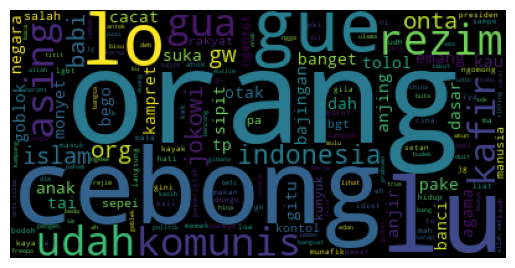

In [102]:
text = ' '.join(df['Text_Remove_Stopwords'][df.Status=="Abusive"])
wordcloud = WordCloud().generate(text)

plt.imshow(wordcloud)
plt.axis("off")
plt.show()

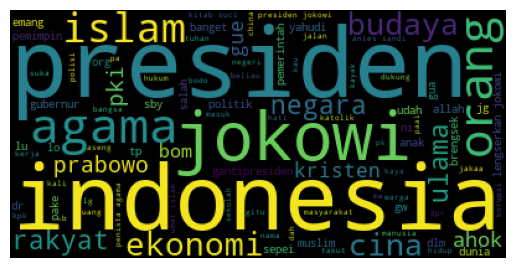

In [103]:
text = ' '.join(df['Text_Remove_Stopwords'][df.Status=="Normal"])
wordcloud = WordCloud().generate(text)

plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [104]:
menghitung_korelasi = df.select_dtypes(include='number')
menghitung_korelasi.corr()

,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong,Total Karakter,Total Kata
HS,1.000000,0.363547,0.711513,0.494688,0.296276,0.247659,0.186068,0.179115,0.735766,0.684968,0.452483,0.226739,-0.155883,-0.144803
Abusive,0.363547,1.000000,0.284790,0.147535,0.069474,-0.031330,0.197108,0.186183,0.260589,0.308616,0.187644,-0.098171,-0.255056,-0.207228
HS_Individual,0.711513,0.284790,1.000000,-0.258696,0.032352,-0.001985,0.214563,0.182193,0.635637,0.962693,-0.236625,0.058739,-0.149520,-0.132263
HS_Group,0.494688,0.147535,-0.258696,1.000000,0.367275,0.342910,-0.009586,0.020890,0.225292,-0.249044,0.914683,0.239048,-0.029365,-0.035476
HS_Religion,0.296276,0.069474,0.032352,0.367275,1.000000,0.094377,-0.005112,0.023625,-0.160218,0.031882,0.346344,0.083810,0.014230,0.011149
HS_Race,0.247659,-0.031330,-0.001985,0.342910,0.094377,1.000000,-0.028977,-0.019921,-0.133927,-0.008784,0.238128,0.245159,-0.043674,-0.044311
HS_Physical,0.186068,0.197108,0.214563,-0.009586,-0.005112,-0.028977,1.000000,0.051693,-0.100620,0.221570,0.000021,-0.025702,-0.053964,-0.041420
HS_Gender,0.179115,0.186183,0.182193,0.020890,0.023625,-0.019921,0.051693,1.000000,-0.096860,0.189508,0.027542,-0.018845,-0.035912,-0.022279
HS_Other,0.735766,0.260589,0.635637,0.225292,-0.160218,-0.133927,-0.100620,-0.096860,1.000000,0.604537,0.226301,0.124331,-0.125659,-0.119848
HS_Weak,0.684968,0.308616,0.962693,-0.249044,0.031882,-0.008784,0.221570,0.189508,0.604537,1.000000,-0.227797,-0.114149,-0.144558,-0.123702


<Axes: xlabel='Total Kata', ylabel='Total Karakter'>

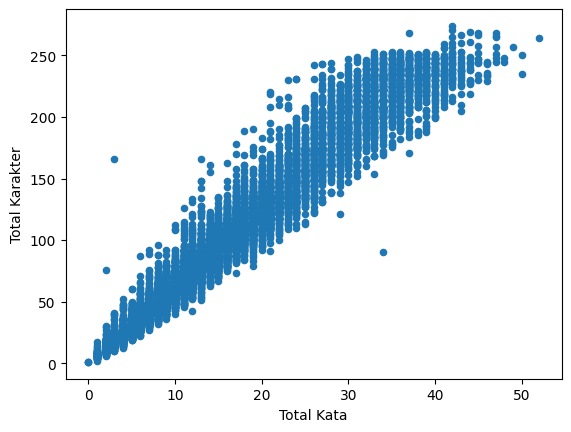

In [105]:
df.plot(x="Total Kata", y="Total Karakter", kind="scatter")

<Axes: xlabel='Status'>

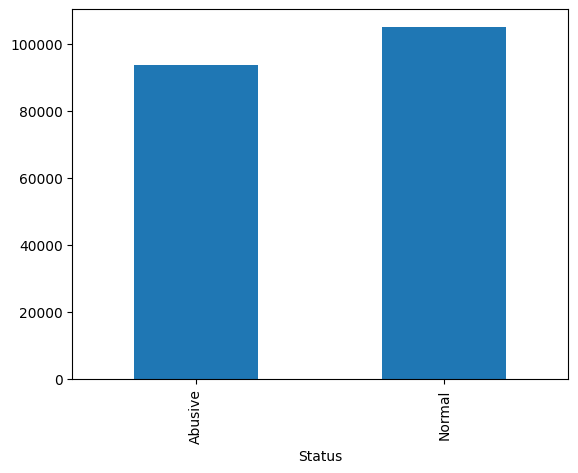

In [106]:
df.groupby('Status')['Total Kata'].sum().plot(kind='bar')
